In [8]:
from pprint import pprint
from itertools import chain

from IPython.display import Image, display
from lark import Lark, Tree, Token, Transformer, v_args
from lark import tree as larkTree
from lark.indenter import Indenter

import os
import parser

NOTES_FOLDER = './note_files/'
NOTE_PATHS = [x for x in os.listdir(NOTES_FOLDER) if x.endswith('.md')]

def display_tree(t, filename='viz.png'):
    larkTree.pydot__tree_to_png(t, filename)
    display(Image(filename))
    os.remove(filename)

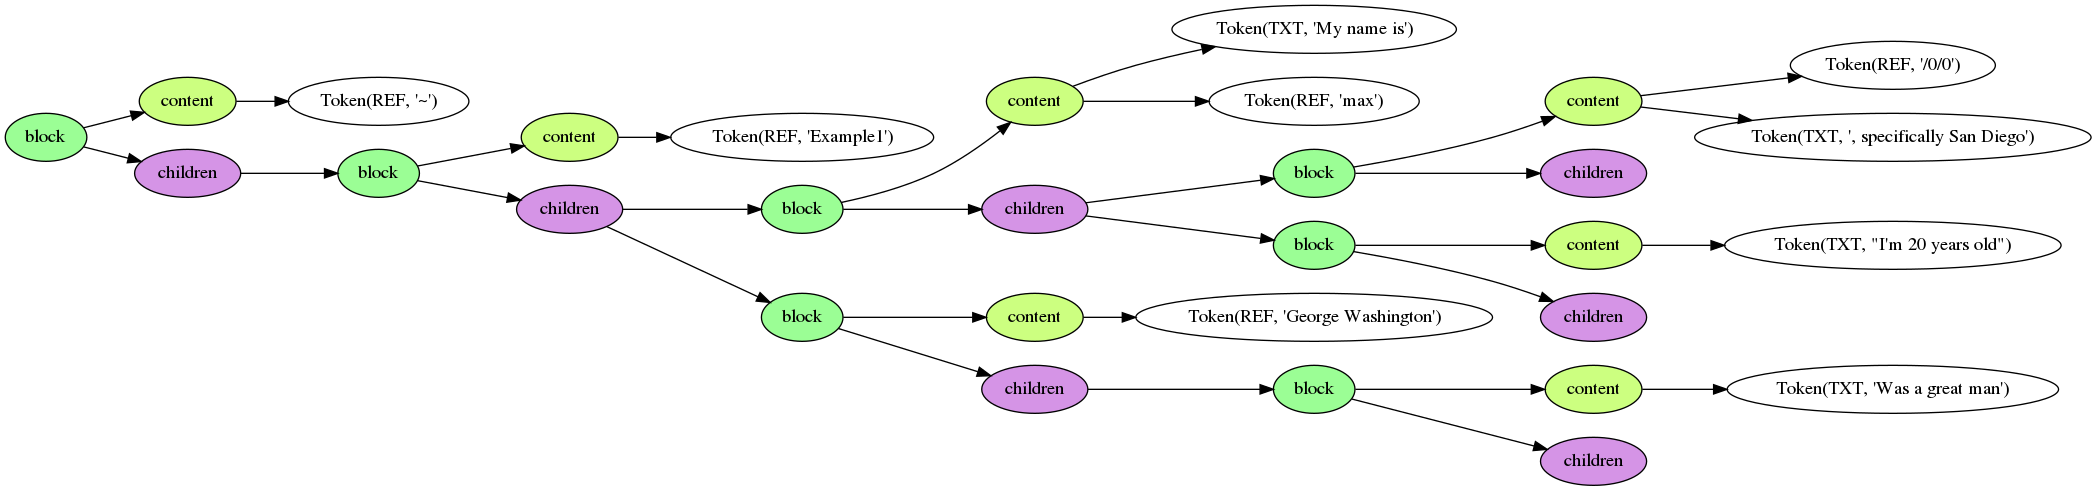

In [9]:

NOTES_FOLDER = './note_files/'
notes_data = parser.parse_notefiles(NOTES_FOLDER)
notes_data.show()

In [10]:
notes_data.get_refs(depth=10)

{'/0/0', 'Example1', 'George Washington', 'max', '~'}

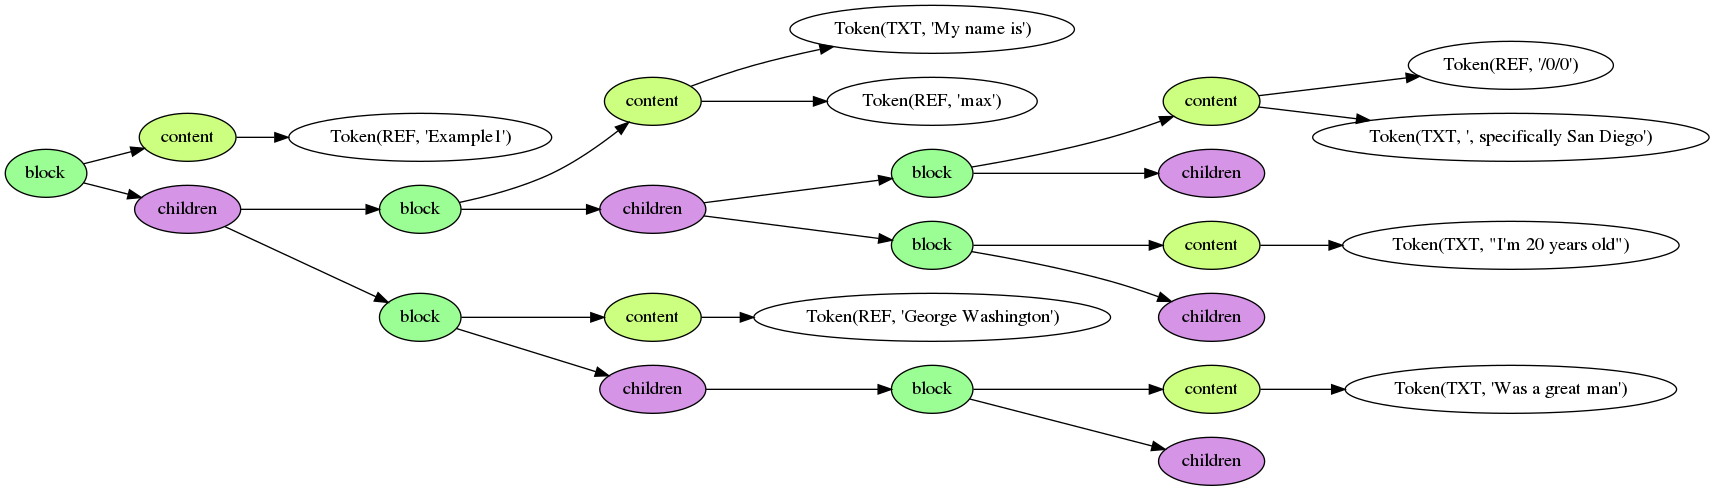

In [13]:
# parser.resolve_ref_block('/1/1', notes_data).show()
# resolve_ref_block('cool', notes_data).show() # Need to join disconnected blocks!
parser.resolve_ref_block('Example1', notes_data).show()


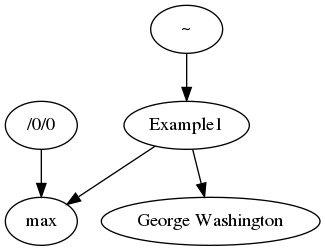

In [14]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import automata as A

rules = A.Ruleset('test')

all_references = notes_data.get_refs(depth=100)
for x in all_references:
    rules.add_instance(x, x)
    block = parser.resolve_ref_block(x, notes_data)
    for ref in block.get_refs(depth=1):
        if x != ref:
            rules.add_relation(x, ref)

rules.draw()

Image('./rules.png')